In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

In [2]:
housing = pd.read_csv("C:/Users/USER/Documents/Refactored_Py_DS_ML_Bootcamp-master/11-Linear-Regression/USA_Housing.csv")

In [3]:
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562390,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928700,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626584,15938.657920,997577.135075,1.232669e+06,1.471210e+06,2.469066e+06


In [6]:
## This the Exploratory data analysis part. 

In [7]:
housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [8]:
housing.index

RangeIndex(start=0, stop=5000, step=1)

In [9]:
## The below graph for the housing price for US is even distributed, so also is the average area income. 

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


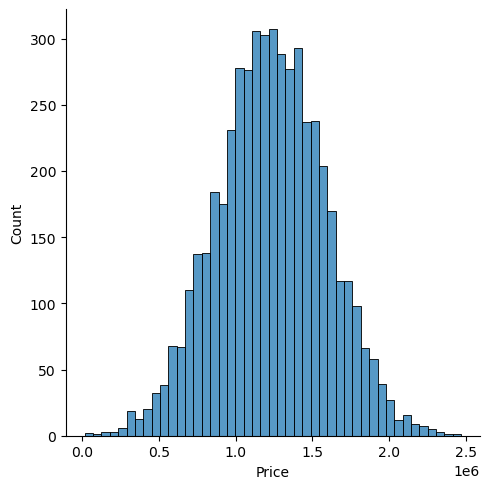

In [10]:
sns.displot(housing['Price'])
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


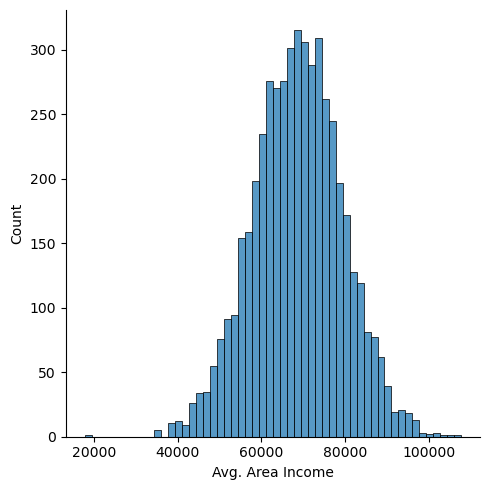

In [11]:
sns.displot(housing['Avg. Area Income'])

In [12]:
## The price for the housing tend to be positively correlated with the Average Area Income of the citizen, meaning the higher the area income the increase in price. 

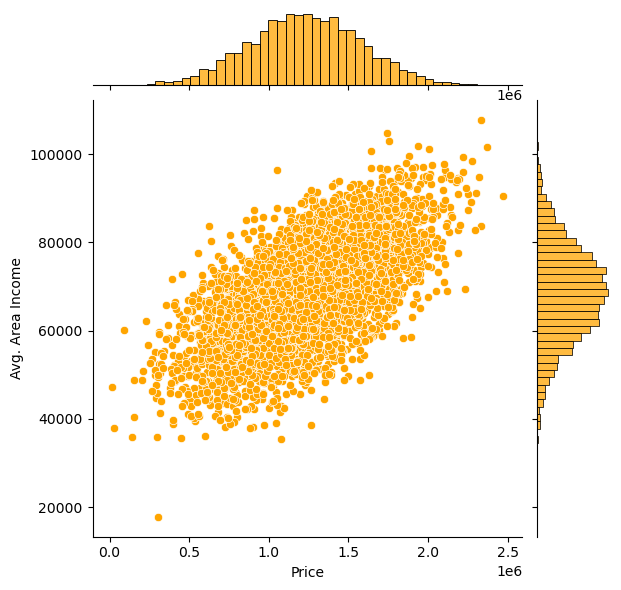

In [13]:
sns.jointplot(data=housing, x='Price', y='Avg. Area Income',color='orange', palette='coolwarm')

In [14]:
housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

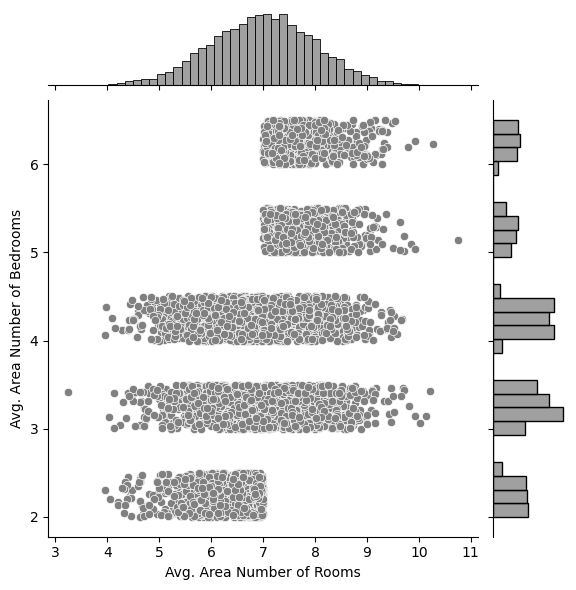

In [15]:
sns.jointplot(data=housing, x='Avg. Area Number of Rooms', y='Avg. Area Number of Bedrooms', color='grey')

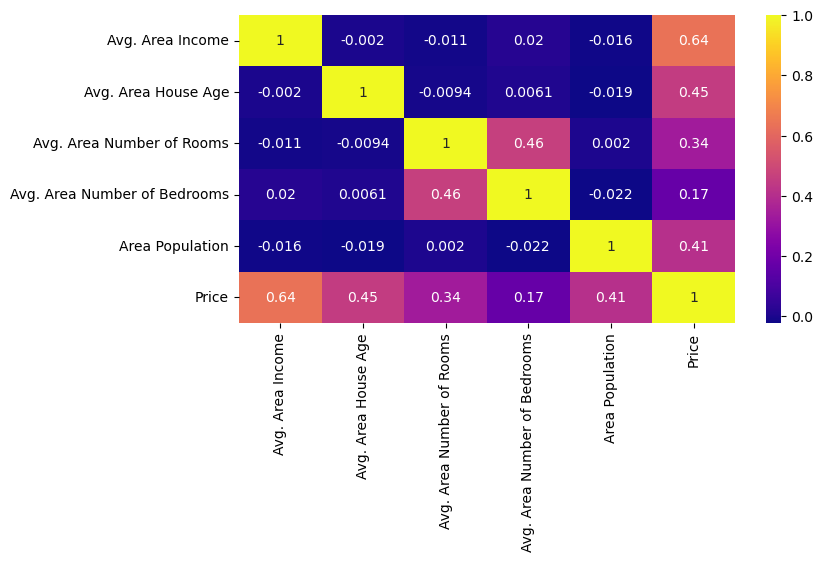

In [16]:
plt.figure(figsize=(8,4))
sns.heatmap(housing.corr(numeric_only=True,), annot=True, cmap='plasma')
plt.show()

<Axes: xlabel='Avg. Area House Age', ylabel='Density'>

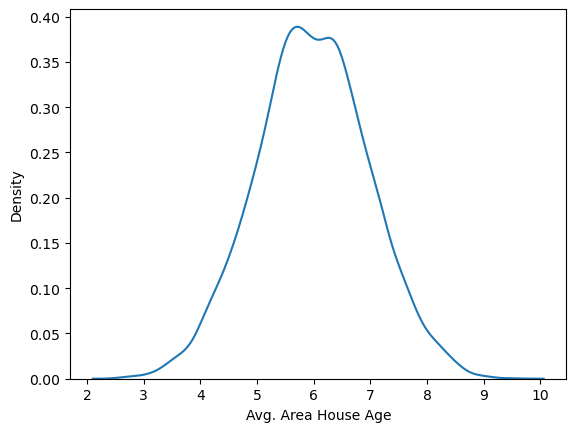

In [17]:
sns.kdeplot(housing['Avg. Area House Age'])

In [18]:
housing.columns 

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [31]:
import cufflinks as cf
cf.go_offline()

In [34]:
housing.iplot(kind='bubble', x='Price', y='Avg. Area Income', size='Area Population')
plt.show()

In [38]:
housing.sum(numeric_only=True).iplot(kind='bar')

In [43]:
X = housing.drop(['Address','Price'], axis=1)

In [44]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947
...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103
4996,78491.27543,6.999135,6.576763,4.02,25616.11549
4997,63390.68689,7.250591,4.805081,2.13,33266.14549
4998,68001.33124,5.534388,7.130144,5.44,42625.62016


In [45]:
y = housing['Price']

In [46]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [48]:
## We will build our model here by first trainin and testing the dataset. 
## Since the data is on a continue bases we will use Linear Regression Model first, before exploring other models. 

In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [52]:
lr = LinearRegression()

In [53]:
lr.fit(X_train, y_train)

LinearRegression()

In [54]:
lr.intercept_

-2641372.667263154

In [56]:
lr.coef_

array([2.16176350e+01, 1.65221120e+05, 1.21405377e+05, 1.31871878e+03,
       1.52251955e+01])

In [57]:
pd.DataFrame(lr.coef_, index=X.columns, columns=['Coefficient'])

,Coefficient
Avg. Area Income,21.617635
Avg. Area House Age,165221.119872
Avg. Area Number of Rooms,121405.376595
Avg. Area Number of Bedrooms,1318.718781
Area Population,15.225196


In [58]:
predictions = lr.predict(X_test)

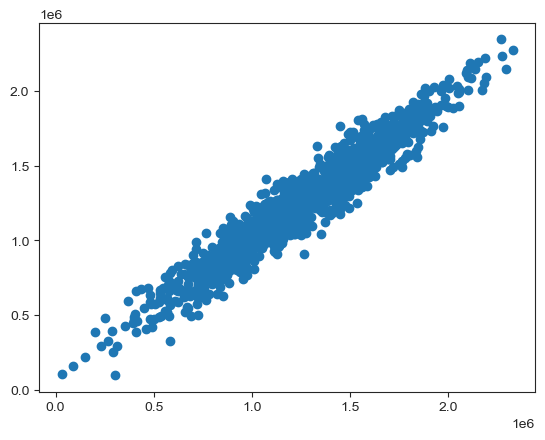

In [64]:
plt.scatter(y_test, predictions)

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



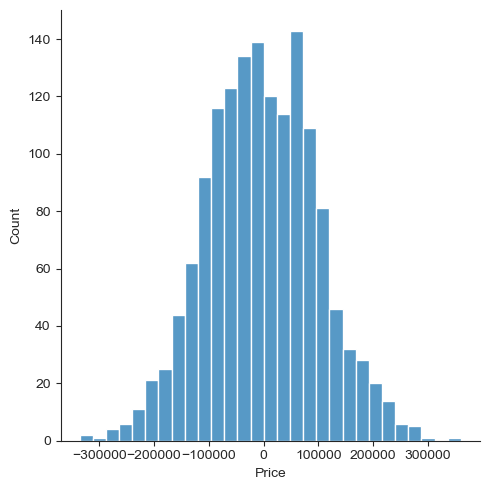

In [61]:
sns.displot((y_test - predictions))

In [65]:
## This is to minimize the error for predictions 

In [66]:
from sklearn import metrics 

In [141]:
print("MAE :", round(metrics.mean_absolute_error(y_test, predictions), 2))

print("MSE :", round(metrics.mean_squared_error(y_test, predictions), 2))

print("RMSE :", round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2))

MAE : 81257.56
MSE : 10169125565.18
RMSE : 100842.08
